# Identifying transiting exoplanet signals in a light curve

## Tutorial do site:
https://docs.lightkurve.org/tutorials/3-science-examples/exoplanets-identifying-transiting-planet-signals.html

In [1]:
import lightkurve as lk
%matplotlib inline

## Testando o tutorial com outra estrela
### kepler 37

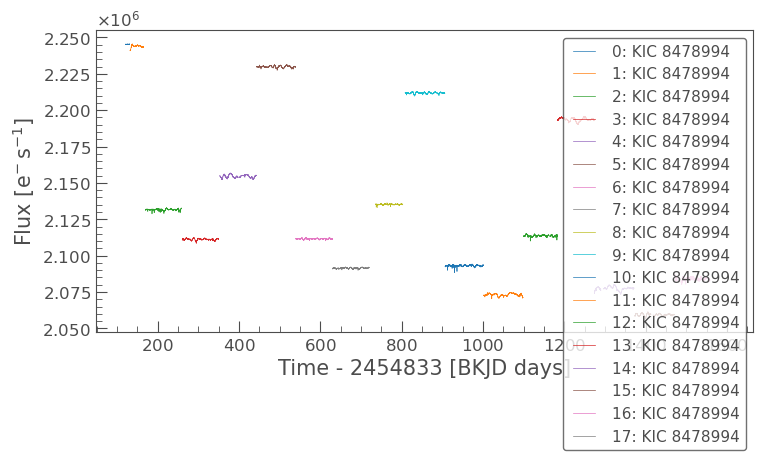

In [2]:
# Search for Kepler observations of Kepler-37
search_result = lk.search_lightcurve('Kepler-37', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot();

In [3]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr008478994,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr008478994,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr008478994,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr008478994,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr008478994,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr008478994,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr008478994,0.0
7,Kepler Quarter 07,2010,Kepler,1800,kplr008478994,0.0
8,Kepler Quarter 08,2011,Kepler,1800,kplr008478994,0.0


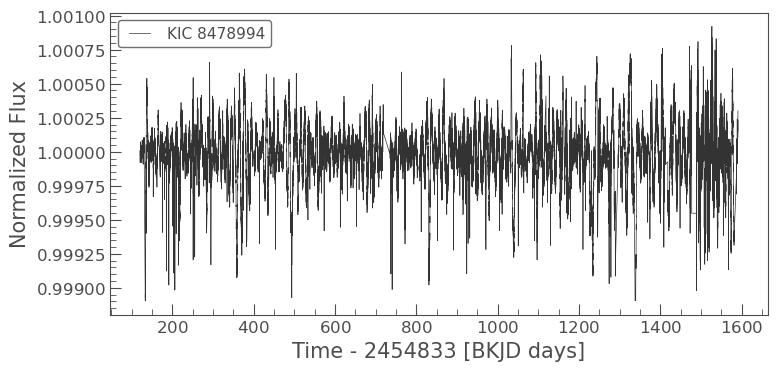

In [4]:
# Flatten the light curve
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();

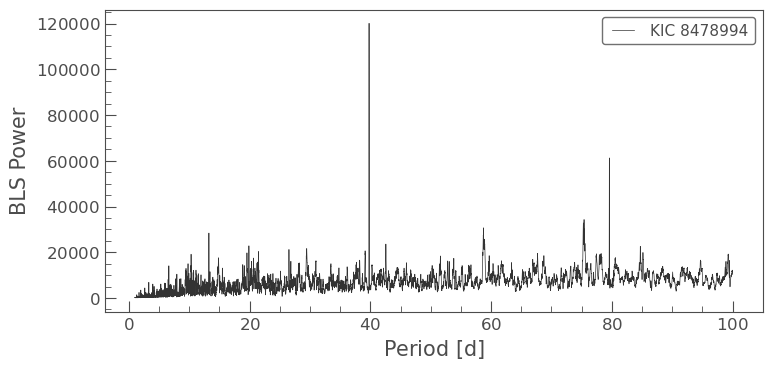

In [5]:
import numpy as np
# Create array of periods to search
period = np.linspace(1, 100, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

### vamos chamar de planeta d,e ... e assim por diante os planetas possivelmente encontrados

In [6]:
planet_d_period = bls.period_at_max_power
planet_d_t0 = bls.transit_time_at_max_power
planet_d_dur = bls.duration_at_max_power

# Check the value for period
planet_d_period

<Quantity 39.79207921 d>

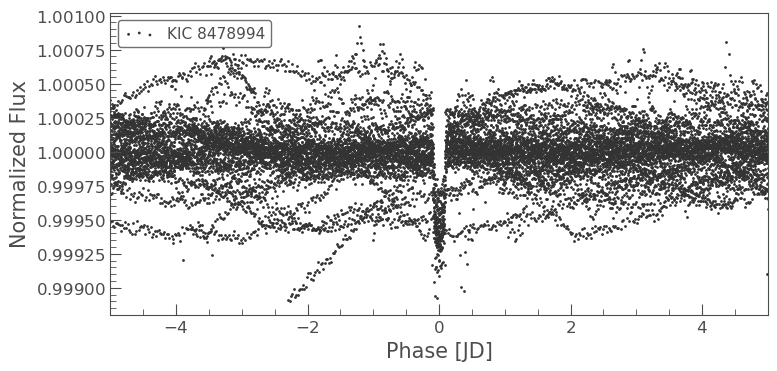

In [7]:
ax = lc.fold(period=planet_d_period, epoch_time=planet_d_t0).scatter()
ax.set_xlim(-5, 5);

In [8]:
# Create a cadence mask using the BLS parameters
planet_d_mask = bls.get_transit_mask(period=planet_d_period,
                                     transit_time=planet_d_t0,
                                     duration=planet_d_dur)

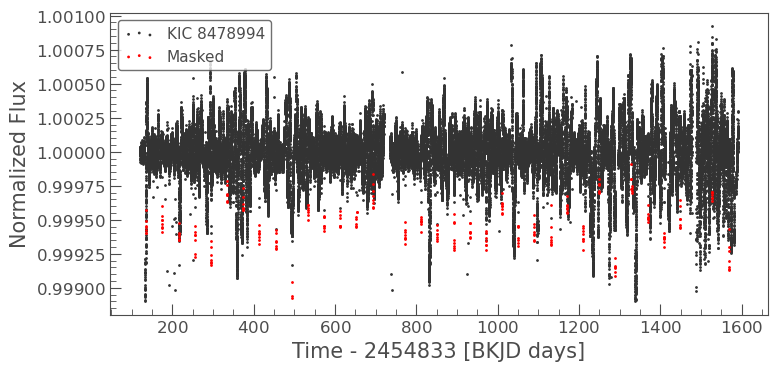

In [9]:
masked_lc = lc[~planet_d_mask]
ax = masked_lc.scatter();
lc[planet_d_mask].scatter(ax=ax, c='r', label='Masked');

In [10]:
planet_d_model = bls.get_transit_model(period=planet_d_period,
                                       transit_time=planet_d_t0,
                                       duration=planet_d_dur)

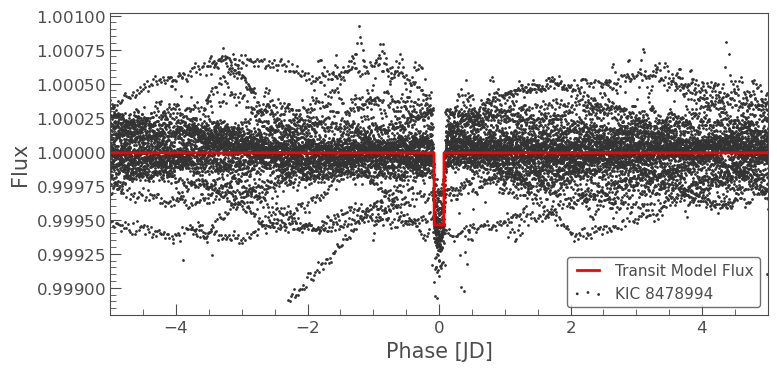

In [11]:
ax = lc.fold(planet_d_period, planet_d_t0).scatter()
planet_d_model.fold(planet_d_period, planet_d_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-5, 5);

### e se tiver mais planetas ... vamos verificar

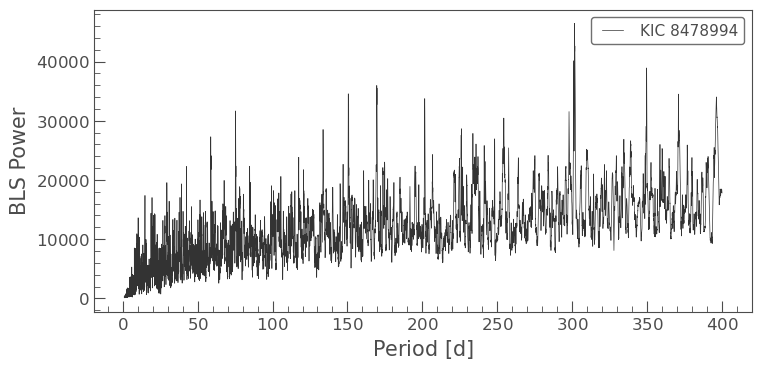

In [12]:
period = np.linspace(1, 400, 10000)
bls = masked_lc.to_periodogram('bls', period=period, frequency_factor=500)
bls.plot();

In [13]:
planet_e_period = bls.period_at_max_power
planet_e_t0 = bls.transit_time_at_max_power
planet_e_dur = bls.duration_at_max_power

# Check the value for period
planet_e_period

<Quantity 301.59675968 d>

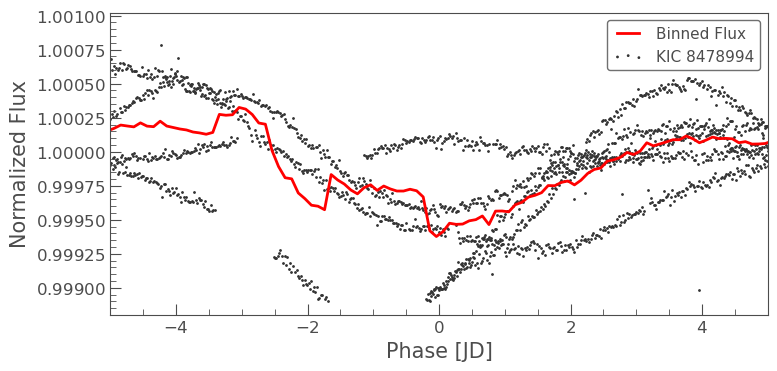

In [15]:
ax = masked_lc.fold(planet_e_period, planet_e_t0).scatter()
masked_lc.fold(planet_e_period, planet_e_t0).bin(.1).plot(ax=ax, c='r', lw=2,
                                                          label='Binned Flux')
ax.set_xlim(-5, 5);

In [16]:
planet_e_model = bls.get_transit_model(period=planet_e_period,
                                       transit_time=planet_e_t0,
                                       duration=planet_e_dur)

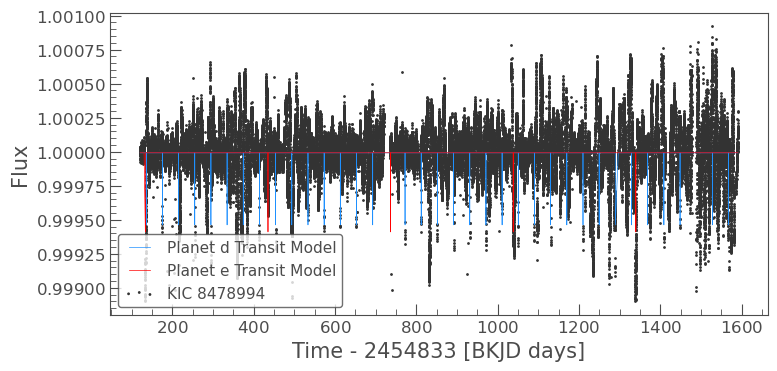

In [17]:
ax = lc.scatter();
planet_d_model.plot(ax=ax, c='dodgerblue', label='Planet d Transit Model');
planet_e_model.plot(ax=ax, c='r', label='Planet e Transit Model');